# Iconic images for EAMENA Concepts

Associate one image to a EAMENA concept to illustrate this latter (ex: Threat type = Agricultural/Pastoral). Insert the concept UUID to the image's metadata (ex: 767e9467-3bc2-3f71-9427-0ace387bd843).

<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/concepts_images_threat_type_agricole.png" width = "500">

</center>

The objective is to link the concept image UUID to the RM (ex: node Threat type) and display these images in a `pyvis` interactive graph

## Libraries and paths

In [ ]:
!rm /content/eamena-data -R
!git clone https://github.com/eamena-project/eamena-data.git
import os
!pip install exif
from exif import Image as exImg
from IPython.display import Image as IpImg
from IPython.display import Markdown

cases_path = "/content/eamena-data/reference-data/concepts/heritage_places/cases/"
cases_img_path = cases_path + "img/"

## Metadata

Photographs of iconic cases of threats types (agricole, vandalsim, etc.)

In [20]:
contents = os.listdir(cases_path)
print("\n".join(contents))


threattype-looting.jpg
threattype-vandalism.jpg
threattype-natural.jpg
threattype-explosives.png
threattype-destruction.jpg
threattype-natural-2.jpg
threattype-natural-2-transp.png
threattype-urbanism.jpg
threattype-reuse.jpg
threattype-agricole.jpg


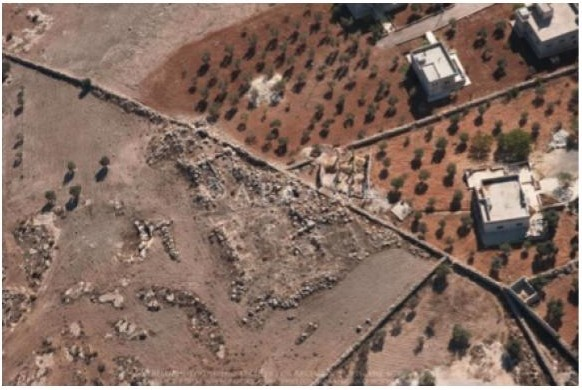

In [21]:
IpImg(cases_img_path + "threattype-agricole.jpg")

### Read

In [11]:
img_path = cases_img_path + "threattype-agricole.jpg"
with open(img_path, 'rb') as img_file:
    img = exImg(img_file)
print(img.has_exif)
sorted(img.list_all())

False


[]

### Write

In [12]:
img.make = '767e9467-3bc2-3f71-9427-0ace387bd843' # = Threat type - Vandalism in the RDM
img.model = 'Threat type - Agricultural/Pastoral'
with open(img_path, 'wb') as new_image_file:
        new_image_file.write(img.get_file())

### Check

**Threat type - Agricultural/Pastoral**

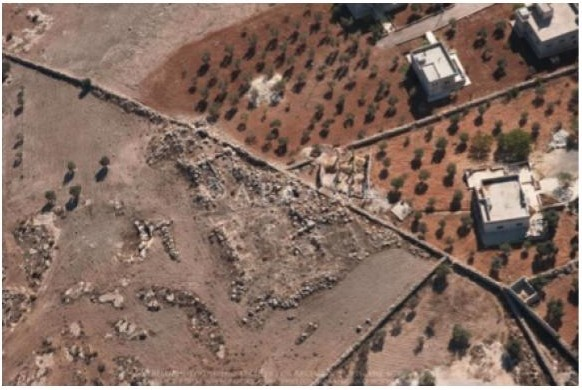

**767e9467-3bc2-3f71-9427-0ace387bd843**

In [14]:
# img_path = '/content/eamena-data/reference-data/concepts/heritage_places/cases/threattype-agricole.jpg'
with open(img_path, 'rb') as img_file:
    img = exImg(img_file)
# img.get("make")
title = img.get("model")
uuid = img.get("make")
display(Markdown(f"**{title}**"))
display(IpImg(img_path))
display(Markdown(f"**{uuid}**"))

## GUI

TODO: radiobutton to select the image, then show the image with its UUID below and its title above

In [18]:
import os
from IPython.display import display, Image, HTML, clear_output
import ipywidgets as widgets

# Set the path to the folder
folder_path = '/content/eamena-data/reference-data/concepts/heritage_places/cases/'

# Get the list of image files in the folder
image_files = [f for f in os.listdir(cases_img_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Create a radio button widget with the list of image files as options
image_selector = widgets.RadioButtons(
    options=image_files,
    description='Select Image:',
    disabled=False
)

# Create an output widget to hold the image display
output_image = widgets.Output()

# Function to display the selected image
def display_image(selected_image):
    with output_image:
        clear_output(wait=True)  # Clear the output area before displaying the new image
        image_path = os.path.join(cases_img_path, selected_image)
        display(Image(filename=image_path, width=400, height=400))

# Event handler for changes in the radio button selection
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        selected_image = change['new']
        display_image(selected_image)

# Attach the event handler to the radio button widget
image_selector.observe(on_change)

# Display the radio button widget and the initial image output widget
display(image_selector)
display(output_image)  # Display the output area for images

# Display the initial image (first image in the list)
initial_image = image_files[0]
display_image(initial_image)

RadioButtons(description='Select Image:', options=('threattype-looting.jpg', 'threattype-vandalism.jpg', 'thre…

Output()